In [4]:
%pip install matplotlib pandas numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# --- Q1: IRIS manipulations + histogram + bonuses (PCA, KMeans, RandomForest CV) ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

# 1) Load IRIS dataset
iris = load_iris(as_frame=True)
df = iris.frame.copy()  # includes features + target
# rename columns to match the question style
df = df.rename(columns={
    "sepal length (cm)": "Sepal.length",
    "sepal width (cm)": "Sepal.width",
    "petal length (cm)": "Petal.length",
    "petal width (cm)": "Petal.width",
})

# Add species name column (Iris name)
target_to_name = dict(enumerate(iris.target_names))
df["Iris name"] = df["target"].map(target_to_name)

df.head()



,Sepal.length,Sepal.width,Petal.length,Petal.width,target,Iris name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
df["Sepal.length_rounded"] = df["Sepal.length"].round().astype(int)

df[["Sepal.length", "Sepal.length_rounded"]].head()


,Sepal.length,Sepal.length_rounded
0,5.1,5
1,4.9,5
2,4.7,5
3,4.6,5
4,5.0,5


In [8]:
# ממוצע Petal.length לכל Iris name (אותו ערך חוזר בכל שורה של אותו מין)
mean_petal_by_species = df.groupby("Iris name")["Petal.length"].transform("mean")

# עמודה חדשה לפי הכלל
df["Letter_by_rule"] = np.where(
    df["Petal.length"] > mean_petal_by_species,
    df["Iris name"].str[0],   # אות ראשונה
    df["Iris name"].str[-1]   # אות אחרונה
)

df[["Iris name", "Petal.length", "Letter_by_rule"]].head(10)


,Iris name,Petal.length,Letter_by_rule
0,setosa,1.4,a
1,setosa,1.4,a
2,setosa,1.3,a
3,setosa,1.5,s
4,setosa,1.4,a
5,setosa,1.7,s
6,setosa,1.4,a
7,setosa,1.5,s
8,setosa,1.4,a
9,setosa,1.5,s


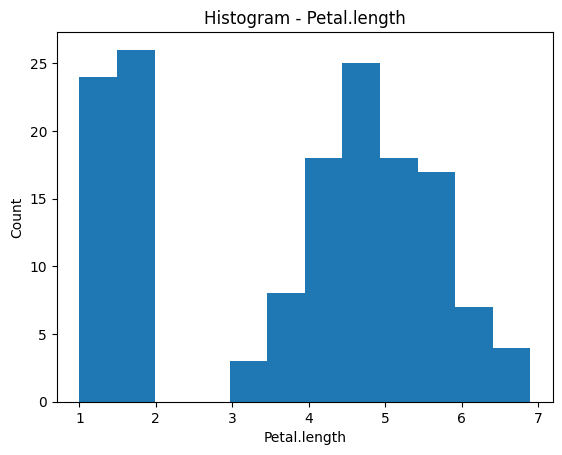

In [9]:
plt.figure()
plt.hist(df["Petal.length"], bins=12)
plt.title("Histogram - Petal.length")
plt.xlabel("Petal.length")
plt.ylabel("Count")
plt.show()
